# Lab 7: Topic Models

In this lab, we'll apply Latent Dirichlet Allocation to the text data that we explored last week. We'll focus on [The Liberator](https://en.wikipedia.org/wiki/The_Liberator_(newspaper)), a prominent anti-slavery newspaper. As a warning, the corpus contains offensively racist language, often quoted from pro-slavery advocates. 

To do the lab, Georgia Tech students can download the resource `liberator-stories.tgz` from T-square. Put it in the same directory as this lab.

In [1]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from glob import glob
from dateutil.parser import parse
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
! tar xvzf liberator-stories.tgz

liberator-stories/
liberator-stories/Issue of March 11, 1853/
liberator-stories/Issue of March 11, 1853/story000.txt
liberator-stories/Issue of March 11, 1853/story008.txt
liberator-stories/Issue of March 11, 1853/story003.txt
liberator-stories/Issue of March 11, 1853/story004.txt
liberator-stories/Issue of March 11, 1853/story006.txt
liberator-stories/Issue of March 11, 1853/story001.txt
liberator-stories/Issue of March 11, 1853/story007.txt
liberator-stories/Issue of March 11, 1853/story002.txt
liberator-stories/Issue of March 11, 1853/story009.txt
liberator-stories/Issue of March 11, 1853/story005.txt
liberator-stories/Issue of June 01, 1855/
liberator-stories/Issue of June 01, 1855/story000.txt
liberator-stories/Issue of June 01, 1855/story008.txt
liberator-stories/Issue of June 01, 1855/story003.txt
liberator-stories/Issue of June 01, 1855/story004.txt
liberator-stories/Issue of June 01, 1855/story006.txt
liberator-stories/Issue of June 01, 1855/story001.txt
liberator-stories/Issu

liberator-stories/Issue of April 01, 1864/story004.txt
liberator-stories/Issue of April 01, 1864/story006.txt
liberator-stories/Issue of April 01, 1864/story001.txt
liberator-stories/Issue of April 01, 1864/story007.txt
liberator-stories/Issue of April 01, 1864/story002.txt
liberator-stories/Issue of April 01, 1864/story009.txt
liberator-stories/Issue of April 01, 1864/story005.txt
liberator-stories/Issue of June 21, 1850/
liberator-stories/Issue of June 21, 1850/story000.txt
liberator-stories/Issue of June 21, 1850/story008.txt
liberator-stories/Issue of June 21, 1850/story003.txt
liberator-stories/Issue of June 21, 1850/story004.txt
liberator-stories/Issue of June 21, 1850/story006.txt
liberator-stories/Issue of June 21, 1850/story001.txt
liberator-stories/Issue of June 21, 1850/story007.txt
liberator-stories/Issue of June 21, 1850/story002.txt
liberator-stories/Issue of June 21, 1850/story009.txt
liberator-stories/Issue of June 21, 1850/story005.txt
liberator-stories/Issue of Decemb

liberator-stories/Issue of November 21, 1863/story001.txt
liberator-stories/Issue of November 21, 1863/story007.txt
liberator-stories/Issue of November 21, 1863/story002.txt
liberator-stories/Issue of November 21, 1863/story009.txt
liberator-stories/Issue of November 21, 1863/story005.txt
liberator-stories/Issue of July 11, 1862/
liberator-stories/Issue of July 11, 1862/story000.txt
liberator-stories/Issue of July 11, 1862/story008.txt
liberator-stories/Issue of July 11, 1862/story003.txt
liberator-stories/Issue of July 11, 1862/story004.txt
liberator-stories/Issue of July 11, 1862/story006.txt
liberator-stories/Issue of July 11, 1862/story001.txt
liberator-stories/Issue of July 11, 1862/story007.txt
liberator-stories/Issue of July 11, 1862/story002.txt
liberator-stories/Issue of July 11, 1862/story009.txt
liberator-stories/Issue of July 11, 1862/story005.txt
liberator-stories/Issue of July 11, 1851/
liberator-stories/Issue of July 11, 1851/story000.txt
liberator-stories/Issue of July 

In [28]:
files = glob('liberator-stories/Iss*/*.txt')

In [34]:
# this list comprehension parses each of the dates in the filenames
dates = [parse(os.path.split(os.path.dirname(filename))[1][9:],'')
         for filename 
         in files]

Read the text into a numpy array.

In [5]:
vect = CountVectorizer(max_df=0.5,min_df=0.01,lowercase=True,input='filename')

In [6]:
X = vect.fit_transform(files)

In [7]:
X.shape

(1220, 5271)

In [8]:
ivoc = {j:i for i,j in vect.vocabulary_.items()}

**Your turn**

1. What is the highest-frequency word in the dataset?
2. Modify the vectorizer to include fewer high-frequency words.

In [128]:
# your code

In [ ]:
vect2 = [] # your code
X2 = vect2.fit_transform(files)

# Running the topic model

In sklearn, we create a `LatentDirichletAllocation` model before fitting it.

In [9]:
lda = LatentDirichletAllocation(n_components=10)

We can fit the model and obtain the topic loadings per document in a single command, using `fit_transform`.

In [10]:
theta = lda.fit_transform(X)

/home/jacob/.local/lib/python3.5/site-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Now let's look at the topics

In [11]:
def show_topics(lda,ivoc):
    for k,topic in enumerate(lda.components_):
        print(k,[ivoc[i] for i in topic.argsort()[::-1][:7]])

In [12]:
show_topics(lda,ivoc)

0 ['fremont', 'gen', 'ibid', 'nigger', 'buchanan', 'niggers', 'chicago']
1 ['representation', 'slaves', 'slave', 'john', 'over', 'adams', 'quincy']
2 ['star', 'presbyterian', 'proceeded', 'withdraw', 'river', 'inquire', 'organize']
3 ['made', 'paper', 'advance', 'square', 'cents', 'per', 'dmund']
4 ['mr', 'anti', 'meeting', 'society', 'church', 'were', 'garrison']
5 ['union', 'should', 'express', 'resolved', 'mr', 'held', 'unless']
6 ['war', 'power', 'states', 'laws', 'slaves', 'armies', 'foreign']
7 ['you', 'had', 'him', 'were', 'man', 'my', 'men']
8 ['states', 'state', 'people', 'south', 'can', 'union', 'men']
9 ['mr', 'union', 'slave', 'these', 'north', 'my', 'south']


## How many topics?

**Your turn**: To see the role of then number of topics on the output, run the model above with half as many and twice as money topics. 

In [ ]:
lda_half = # your code here
theta_half = lda_half.fit_transform(X)

lda_twice = # your code here. This might take a few minutes to run.
theta_twice = lda_twice.fit_transform(X)

In [94]:
# rerun after filling in the code above
show_topics(lda_half,ivoc)

0 ['you', 'men', 'do', 'man', 'had', 'were', 'him']
1 ['made', 'paper', 'advance', 'quincy', 'square', 'cents', 'phillips']
2 ['mann', 'statue', 'horace', 'mr', 'liberator', 'webster', 'phillips']
3 ['mr', 'had', 'meeting', 'were', 'society', 'anti', 'committee']
4 ['states', 'state', 'constitution', 'power', 'government', 'law', 'shall']


In [95]:
# rerun after filling in the code above
show_topics(lda_twice,ivoc)

0 ['made', 'paper', 'advance', 'square', 'cents', 'per', 'dmund']
1 ['hold', '10', '50', '100', 'slave', '20', 'men']
2 ['mr', 'anti', 'meeting', 'were', 'had', 'society', 'church']
3 ['dissolve', 'stick', 'thinks', 'entered', 'threatened', 'threat', 'unless']
4 ['party', 'south', 'whig', 'union', 'national', 'know', 'anti']
5 ['niggers', 'nigger', 'johnson', 'capt', 'audience', 'brothers', 'worthy']
6 ['states', 'state', 'constitution', 'union', 'government', 'law', 'south']
7 ['her', 'were', 'these', 'had', 'him', 'states', 'country']
8 ['hold', '000', '10', '20', 'value', 'carolina', '50']
9 ['you', 'men', 'do', 'man', 'were', 'us', 'had']
10 ['him', 'fort', 'should', 'man', 'can', 'law', 'theday']
11 ['south', 'carolina', 'congress', 'adopted', 'mr', 'people', 'union']
12 ['states', 'other', 'free', 'tending', 'compensation', 'aiding', 'must']
13 ['mr', 'slave', 'principles', 'you', 'christian', 'into', 'out']
14 ['hon', 'pierce', 'secretary', 'party', 'cabinet', 'mr', 'union']
15 

## How many iterations?

The number of iterations can also affect the quality of the topics.

In [13]:
lda_quick = LatentDirichletAllocation(n_components=10,max_iter=2)
lda_quick.fit(X)
show_topics(lda_quick,ivoc)

/home/jacob/.local/lib/python3.5/site-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


0 ['constitution', 'slave', 'slaves', 'representation', 'garrison', 'over', 'john']
1 ['you', 'do', 'man', 'men', 'him', 'what', 'us']
2 ['union', 'states', 'some', 'men', 'were', 'these', 'ship']
3 ['states', 'other', 'free', 'tending', 'binding', 'constitution', 'must']
4 ['made', 'paper', 'advance', 'square', 'cents', 'per', 'dmund']
5 ['had', 'south', 'my', 'these', 'presbyterian', 'now', 'us']
6 ['mr', 'were', 'had', 'states', 'state', 'people', 'said']
7 ['hold', 'us', 'celebration', 'were', 'slave', 'man', 'may']
8 ['war', 'power', 'states', 'laws', 'slaves', 'foreign', 'invaded']
9 ['slave', 'value', 'free', 'south', 'ibid', 'her', 'states']


**Discuss** are these topics more or less coherent than in the 10-topic model above?

If you like, try running one of the other models for longer than the default number of iterations, which you can find here: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

In [15]:
lda_longrun = LatentDirichletAllocation(max_iter=100,evaluate_every=5,verbose=1)
theta_longrun = lda_longrun.fit_transform(X)

/home/jacob/.local/lib/python3.5/site-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100, perplexity: 1989.7552
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100, perplexity: 1965.6389
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100, perplexity: 1957.8867
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100, perplexity: 1953.9397
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100, perplexity: 1951.5312
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter:

In [16]:
show_topics(lda_longrun,ivoc)

0 ['state', 'states', 'shall', 'law', 'congress', 'said', 'mr']
1 ['states', 'other', 'tending', 'free', 'aiding', 'binding', 'must']
2 ['made', 'paper', 'advance', 'square', 'cents', 'per', 'dmund']
3 ['mr', 'presbyterian', 'slave', 'she', 'her', 'do', 'star']
4 ['war', 'states', 'power', 'united', 'congress', 'army', 'government']
5 ['canada', 'administration', 'fugitives', 'congress', 'cincinnati', 'vote', 'people']
6 ['you', 'do', 'men', 'can', 'what', 'man', 'us']
7 ['union', 'party', 'mr', 'president', 'tribune', 'phillips', 'constitution']
8 ['representation', 'slaves', 'slave', 'john', 'over', 'constitution', 'quincy']
9 ['mr', 'had', 'were', 'him', 'said', 'meeting', 'her']


## Analysis

**Your turn** From all your topic models, select the topic that seems most related to the civil war. If there is no such topic, run the model again with a different number of topics.

In [17]:
war_topic = 4

You can view the strength of each topic in each document in the output variable, `theta`

In [18]:
theta_longrun

array([[  1.14944204e-03,   1.14942556e-03,   9.89655083e-01, ...,
          1.14944876e-03,   1.14943552e-03,   1.14944062e-03],
       [  4.21593073e-02,   5.65092931e-04,   5.65024485e-04, ...,
          5.65292742e-04,   5.65117429e-04,   5.65078896e-04],
       [  5.55705846e-04,   5.55616352e-04,   5.55605342e-04, ...,
          5.55735938e-04,   5.55600527e-04,   2.14721210e-01],
       ..., 
       [  1.31872517e-01,   1.67557176e-04,   1.67557813e-04, ...,
          1.67525003e-04,   1.67547202e-04,   1.67549217e-04],
       [  1.00046971e-02,   1.00048251e-02,   1.00000911e-02, ...,
          1.00001351e-02,   1.00008393e-02,   4.04845616e-01],
       [  5.49560751e-04,   5.49641522e-04,   5.49571181e-04, ...,
          2.95480246e-02,   5.49485478e-04,   5.86771549e-01]])

**Your turn** verify that `theta` is a probability distribution over topics

In [102]:
# your code here

### Viewing documents

It can be helpful to look at individual documents.

In [19]:
theta_longrun[:,war_topic].max()

0.99262281266480634

In [20]:
top_docs = theta_longrun[:,war_topic].argsort()[::-1][:3]

In [21]:
top_docs

array([ 415, 1165,  845])

In [22]:
for filenum in top_docs:
    with open (files[filenum]) as fin:
        print(files[filenum],fin.readlines())

Issue of March 31, 1865/story001.txt [' "I lay this down as the low of nations. I say that militaryauthority takes, for the time the place of all municipalinstitutions, and SLAVERY AMONG THE REST;and that, under that state of things, so far from its beingtrue that the States where slavery exists have the exclusivemanagement of the subject, not only the PRESIDENT OFTHE UNITED STATES, but the COMMANDER OFTHE ARMY,HAS POWER TO ORDER THE UNIVERSAL EMANCIPATIONOF THE SLAVES . . . . From the instantthat the slaveholding States become the theatre of a war,CIVIL, servile, or foreign, from that instant the war powersof CONGRESS extend to interference institution ofslavery, IN EVERY WAY IN WHICH IT CAN BE INTERFEREDWITH, from a claim of indemnity for slaves taken or destroyed,to the cession of States, burdened with slavery, toa foreign power. . . . It is a war power. I say it in a wpower; and when your country is actually in war, whetherit be a war of invasion or a war of insurrection, Congressh

It's the same story every time! (At least the story really is about war...) 

At this point, it would be helpful to understand why this story appears multiple times in the corpus: was it really reprinted in each of these issues, or was there a mistake in the data entry or pipeline?

## Topic strength over time

Let's try to plot the strength of the war topic over time

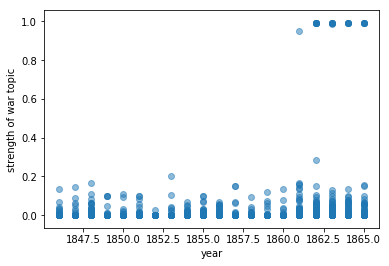

In [23]:
#plt.scatter([date.year for date in dates],theta[:,0],alpha=0.5);
plt.scatter([date.year for date in dates],theta_longrun[:,war_topic],alpha=0.5);
plt.ylabel('strength of war topic')
plt.xlabel('year');

**Your turn**: In my opinion, this visualization isn't great. Can you think of a graphical way to more clearly show the strength of this topic over time? You may want to transform the data before doing this.

Consider using [seaborn](https://seaborn.pydata.org/). To do this, you'll need to import pandas and make the data into a dataframe.